In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Display all columns when viewing dataframes
pd.set_option('display.max_columns', None)


In [2]:
# Load the dataset
df = pd.read_csv("/content/Netflix Dataset (1).csv")


df.head()


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [3]:
# Check basic info about dataset
df.info()

# Summary statistics for numerical columns
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3

In [5]:
print(df.columns.tolist())


['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [6]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check again
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [7]:
# Data Prossesing
# Fill missing values safely
if 'country' in df.columns:
    df['country'] = df['country'].fillna('Unknown')
else:
    print("⚠️ 'country' column not found — skipping country fill step.")

df['director'] = df['director'].fillna('Not Available') if 'director' in df.columns else 'Not Available'
df['cast'] = df['cast'].fillna('Not Available') if 'cast' in df.columns else 'Not Available'
df['rating'] = df['rating'].fillna('Not Rated') if 'rating' in df.columns else 'Not Rated'

# Convert date_added to datetime
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year


In [8]:
df.head(2)


show_id category  title           director  \
0      s1  TV Show     3%      Not Available   
1      s2    Movie  07:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

        release_date rating   duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   

                                                type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...

In [11]:
# 1️⃣ Overview
# --------------------------------------------------
print("📊 Dataset Overview")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Columns: {list(df.columns)}")

print("\n🧭 Basic Info:")
display(df.head(2))

📊 Dataset Overview
Total Rows: 7789
Total Columns: 11
Columns: ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']

🧭 Basic Info:


show_id category  title           director  \
0      s1  TV Show     3%      Not Available   
1      s2    Movie  07:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

        release_date rating   duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   

                                                type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...

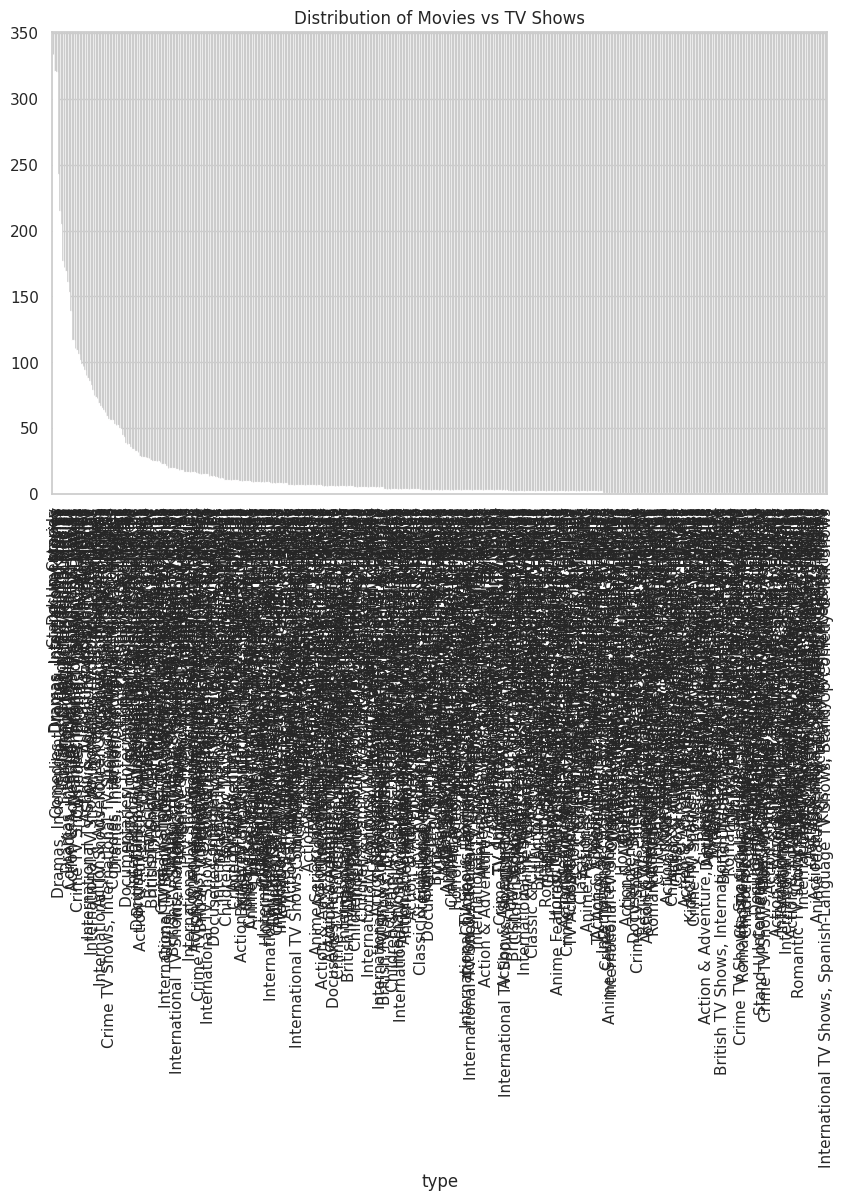

In [12]:
# 2️⃣ Movies vs TV Shows
# --------------------------------------------------
safe_plot(
    'type' in df.columns,
    lambda: df['type'].value_counts().plot(kind='bar', color=['#f94144','#577590']),
    "Distribution of Movies vs TV Shows"
)

/tmp/ipython-input-4167699031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda: sns.barplot(


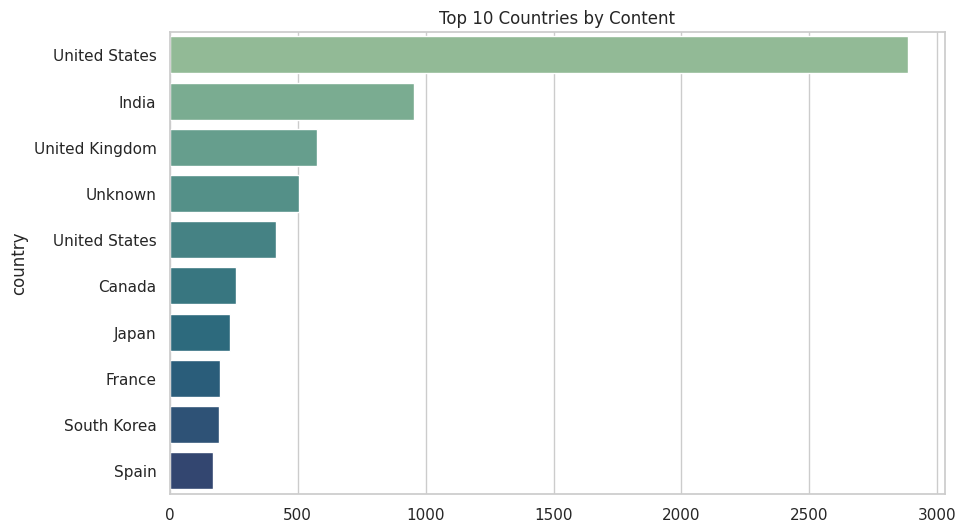

In [14]:
# 4️⃣ Top 10 Countries
# --------------------------------------------------
safe_plot(
    'country' in df.columns,
    lambda: sns.barplot(
        x=df['country'].dropna().str.split(',').explode().value_counts().head(10).values,
        y=df['country'].dropna().str.split(',').explode().value_counts().head(10).index,
        palette="crest"),
    "Top 10 Countries by Content"
)

/tmp/ipython-input-2595305358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda: sns.countplot(


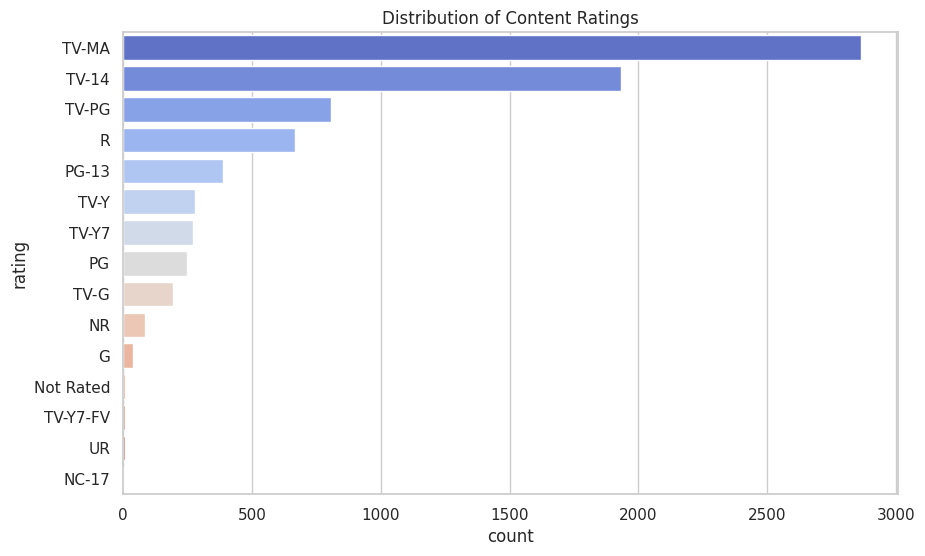

In [34]:


# --------------------------------------------------
#  Ratings Distribution
# --------------------------------------------------
safe_plot(
    'rating' in df.columns,
    lambda: sns.countplot(
        data=df,
        y='rating',
        order=df['rating'].value_counts().index,
        palette='coolwarm'),
    "Distribution of Content Ratings"
)

/tmp/ipython-input-3044711964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda: sns.barplot(


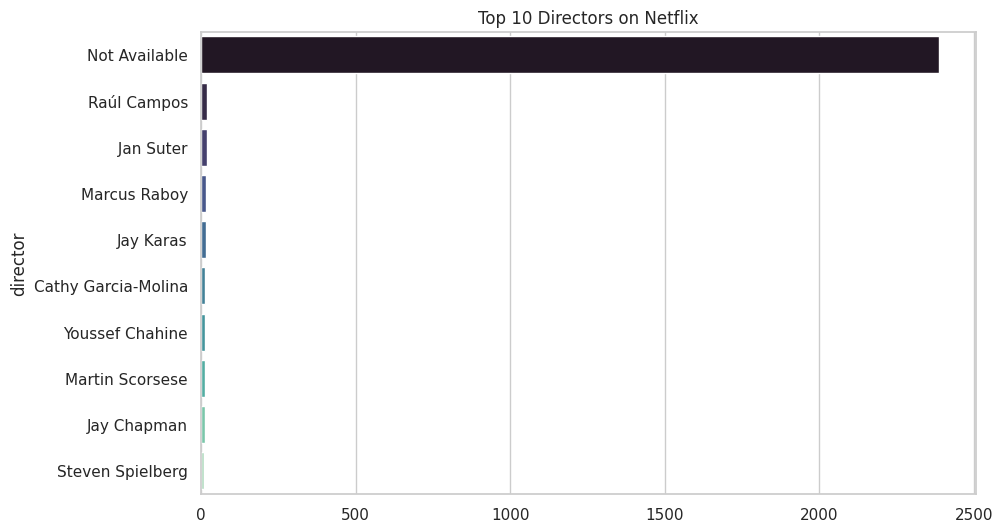

In [16]:
# 7️⃣ Top Directors (if available)
# --------------------------------------------------
safe_plot(
    'director' in df.columns,
    lambda: sns.barplot(
        x=df['director'].dropna().str.split(',').explode().value_counts().head(10).values,
        y=df['director'].dropna().str.split(',').explode().value_counts().head(10).index,
        palette="mako"),
    "Top 10 Directors on Netflix"
)

In [17]:
# 8️⃣ Country-specific Filter Example
# --------------------------------------------------
if 'country' in df.columns:
    country_filter = input("\n🌍 Enter a country to filter (or press Enter to skip): ").strip()
    if country_filter:
        filtered = df[df['country'].str.contains(country_filter, case=False, na=False)]
        print(f"\n📌 Found {len(filtered)} titles from {country_filter}")
        display(filtered.head(5))
    else:
        print("➡️ No country filter applied.")
else:
    print("⚠️ Column 'country' not found. Skipping filter example.")


🌍 Enter a country to filter (or press Enter to skip): Brazil

📌 Found 88 titles from Brazil


show_id category                      title                      director  \
0        s1  TV Show                         3%                 Not Available   
208    s209    Movie           A new Capitalism                 Not Available   
218    s219  TV Show            A Queen Is Born                  Carla Barros   
230    s231    Movie           A Sort of Family                  Diego Lerman   
320    s321    Movie  Afonso Padilha: Classless  Junior Carelli, Rudge Campos   

                                                  cast  \
0    João Miguel, Bianca Comparato, Michel Gomes, R...   
208                                      Not Available   
218                      Gloria Groove, Alexia Twister   
230  Bárbara Lennie, Daniel Aráoz, Claudio Tolcachi...   
320                                     Afonso Padilha   

                                               country       release_date  \
0                                               Brazil    August 14, 2020   
208                                             Brazil      June 12, 2018   
218                                             Brazil  November 11, 2020   
230  Argentina, Brazil, France, Poland, Germany, De...      April 1, 2018   
320                                             Brazil  September 3, 2020   

    rating   duration                                               type  \
0    TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
208  TV-14     76 min                Documentaries, International Movies   
218  TV-14   1 Season                 International TV Shows, Reality TV   
230  TV-14     96 min            Dramas, International Movies, Thrillers   
320  TV-MA     63 min                                    Stand-Up Comedy   

                                           description  
0    In a future where the elite inhabit an island ...  
208  Entrepreneurs worldwide explore alternatives t...  
218  Gloria Groove and Alexia Twister make drag dre...  
230  An Argentine doctor faces legal and ethical ch...  
320  Brazilian comedian Afonso Padilha dives into h...

In [20]:
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [25]:
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Verify new column
print(df[['release_date', 'release_year']].head())


  release_date  release_year
0   2020-08-14        2020.0
1   2016-12-23        2016.0
2   2018-12-20        2018.0
3   2017-11-16        2017.0
4   2020-01-01        2020.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


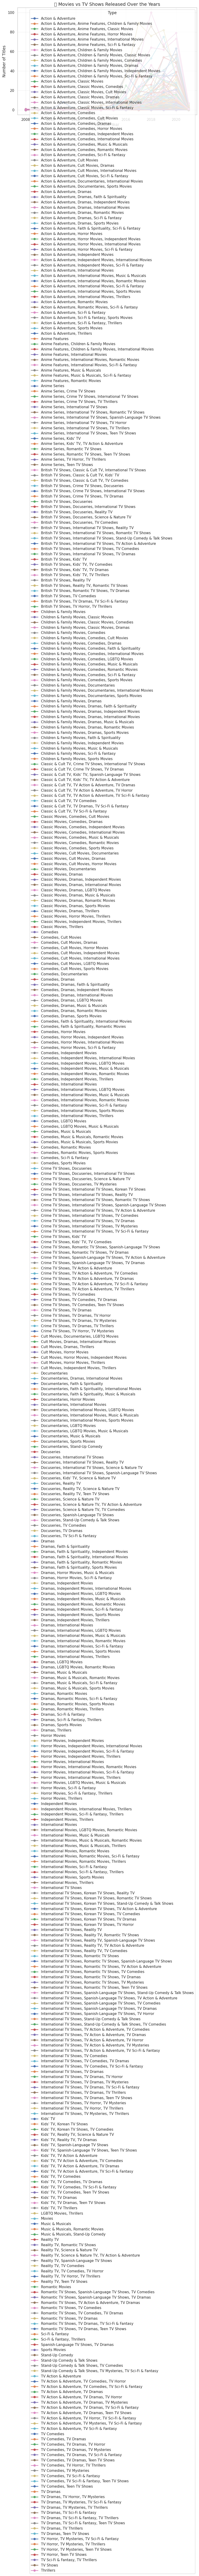

In [27]:
if {'type', 'release_year'}.issubset(df.columns):
    df_filtered = df.dropna(subset=['release_year', 'type'])
    trend_data = df_filtered.groupby(['release_year', 'type']).size().unstack(fill_value=0)
    if not trend_data.empty:
        trend_data.plot(marker='o', linewidth=2)
        plt.title("📈 Movies vs TV Shows Released Over the Years", fontsize=14)
        plt.xlabel("Release Year")
        plt.ylabel("Number of Titles")
        plt.legend(title="Type")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("⚠️ No valid data found for plotting.")
else:
    print("⚠️ Columns 'type' or 'release_year' not found.")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


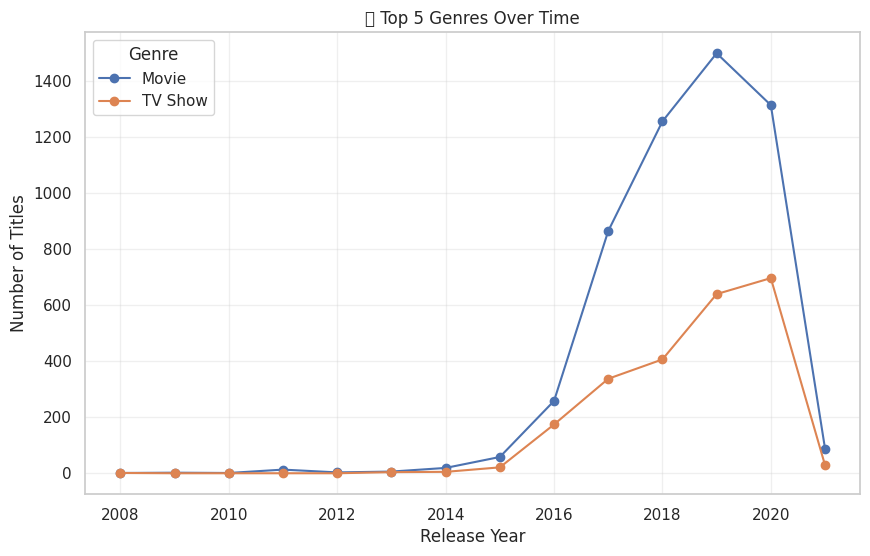

In [28]:
if {'category', 'release_year'}.issubset(df.columns):
    df['main_genre'] = df['category'].astype(str).str.split(',').str[0].str.strip()
    genre_year = df.groupby(['release_year', 'main_genre']).size().unstack(fill_value=0)
    top_genres = genre_year.sum().sort_values(ascending=False).head(5).index
    genre_year[top_genres].plot(marker='o')
    plt.title("🎬 Top 5 Genres Over Time")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.legend(title="Genre")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("⚠️ Columns 'category' or 'release_year' not found.")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


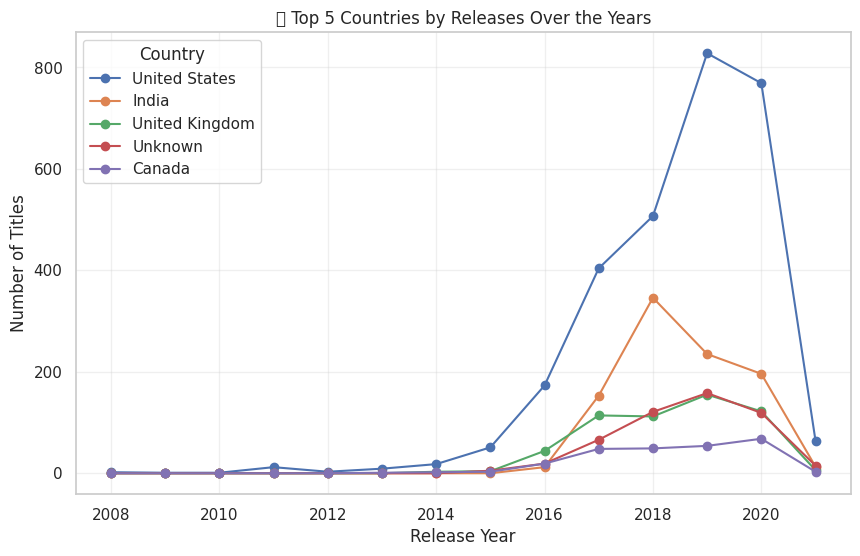

In [29]:
if {'country', 'release_year'}.issubset(df.columns):
    df_exp = df.dropna(subset=['country'])
    df_exp['country'] = df_exp['country'].str.split(',').str[0].str.strip()
    country_year = df_exp.groupby(['release_year', 'country']).size().unstack(fill_value=0)
    top_countries = country_year.sum().sort_values(ascending=False).head(5).index
    country_year[top_countries].plot(marker='o')
    plt.title("🌍 Top 5 Countries by Releases Over the Years")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.legend(title="Country")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("⚠️ Columns 'country' or 'release_year' not found.")


/tmp/ipython-input-3246567925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


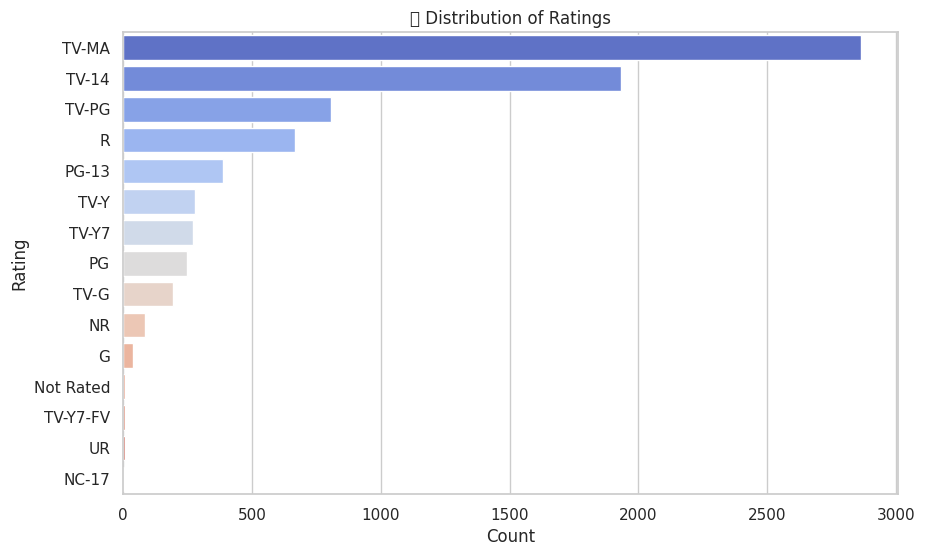

In [30]:
if 'rating' in df.columns:
    sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
    plt.title("📊 Distribution of Ratings")
    plt.xlabel("Count")
    plt.ylabel("Rating")
    plt.show()
else:
    print("⚠️ Column 'rating' not found.")


In [31]:
print("📌 SUMMARY INSIGHTS")

if 'type' in df.columns:
    type_share = df['type'].value_counts(normalize=True) * 100
    print(f"Movies: {type_share.get('Movie', 0):.1f}% | TV Shows: {type_share.get('TV Show', 0):.1f}%")

if 'country' in df.columns:
    top_country = df['country'].dropna().str.split(',').explode().value_counts().idxmax()
    print(f"🌍 Top Content-Producing Country: {top_country}")

if 'category' in df.columns:
    top_genre = df['category'].dropna().str.split(',').explode().value_counts().idxmax()
    print(f"🎭 Most Common Genre: {top_genre}")

if 'release_year' in df.columns:
    peak_year = df['release_year'].value_counts().idxmax()
    print(f"📆 Year with Most Releases: {int(peak_year)}")


📌 SUMMARY INSIGHTS
Movies: 0.0% | TV Shows: 0.0%
🌍 Top Content-Producing Country: United States
🎭 Most Common Genre: Movie
📆 Year with Most Releases: 2019
